In [2]:
# Using various models to predict outcomes of drug treatment based on risk factors. 

In [3]:
# Libraries Utilized:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load Dataset
df = pd.read_csv("C:/Users/Conor/Documents/Personal_projects_data/drug200.csv")

In [5]:
print(df)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]


In [6]:
# Data cleaning step 1: Missing values?
missing = df.isnull().sum()[df.isnull().sum() > 0]
if missing.empty:
    print("Yay! No missing values")

Yay! No missing values


Sex
M    104
F     96
Name: count, dtype: int64
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64
Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Ages')

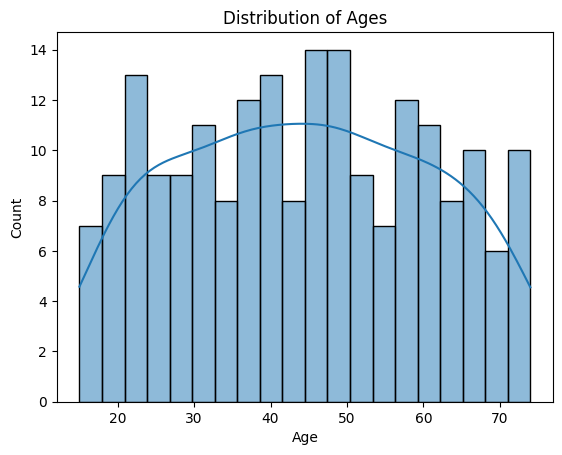

In [7]:
# Early Dataset Exploration:
print(df.Sex.value_counts())
print(df.BP.value_counts())
print(df.Drug.value_counts())
print(df.Cholesterol.value_counts())

sns.histplot(df.Age, kde=True,bins=20)
plt.title("Distribution of Ages")

Text(0.5, 1.0, 'Distribution of Na to K ratio')

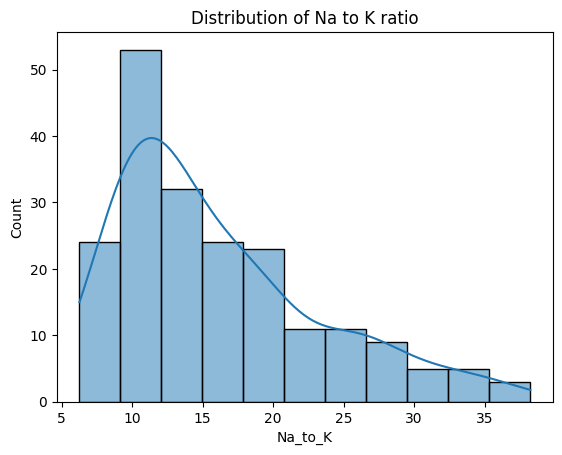

In [8]:
sns.histplot(df.Na_to_K,kde=True)
plt.title("Distribution of Na to K ratio")

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Text(0.5, 0, 'Sex')

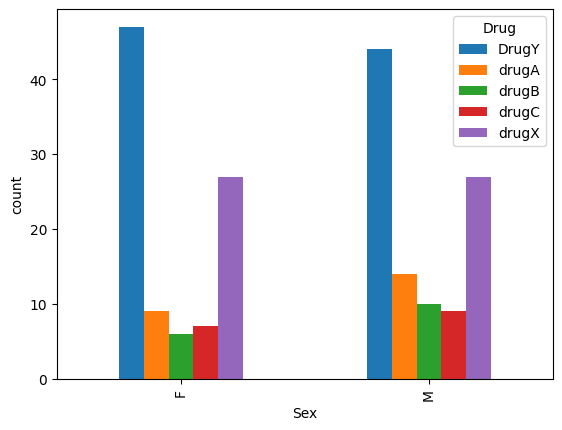

In [10]:
pd.crosstab(df.Sex,df.Drug).plot.bar()
plt.ylabel("count")
plt.xlabel("Sex")

Observations:
Age is fairly normally distributed.  Male and female are balanced, as are BP and cholesterol
Na to K ratio has a moderate right-skewed distribution. 
Drug type is not equally distributed, with Drug Y being more common. Also Equally distributed by sex. 



FEATURE ENGINEERING: 

In [11]:
# Replace ordinally arranged categorical variables with numerical values. 
df.replace({"BP" : {"LOW": 0 , "NORMAL": 1, "HIGH": 2},"Cholesterol":{"NORMAL": 0, "HIGH": 1}},inplace=True) 

C:\Users\Conor\AppData\Local\Temp\ipykernel_14904\4131611029.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"BP" : {"LOW": 0 , "NORMAL": 1, "HIGH": 2},"Cholesterol":{"NORMAL": 0, "HIGH": 1}},inplace=True)


In [12]:
# Replace categorical variables with dummy variables for easier model implementation, using one-hot encoding.
df = pd.get_dummies(df,dtype=int) 
